In [17]:
import matplotlib.pyplot as plt
import sys

sys.path.insert(0, '/home/caron/Bureau/Model/HexagonalScale/ST-GNN-for-wildifre-prediction/Prediction')

from config import *
from tools import *
from features import *

import pickle

#df = read_object('df_binary_0_8_risk-watershed.pkl', Path('firemen/firepoint/2x2/train/'))
#features, train_features, kmeans_features = get_features_for_sinister_prediction('firemen', 'firepoint', False)

#features_name, _ = get_features_name_lists_2D(df.shape[1], features)

array = pickle.load(open('firemen/firepoint/2x2/train/2D_database/departement-01-ain/X_354.pkl', 'rb'))
print(array.shape)

(106, 45, 51)


In [73]:
features_name

['temp',
 'dwpt',
 'rhum',
 'prcp',
 'wdir',
 'wspd',
 'prec24h',
 'dc',
 'ffmc',
 'dmc',
 'nesterov',
 'munger',
 'kbdi',
 'isi',
 'angstroem',
 'bui',
 'fwi',
 'dailySeverityRating',
 'temp16',
 'dwpt16',
 'rhum16',
 'prcp16',
 'wdir16',
 'wspd16',
 'prec24h16',
 'days_since_rain',
 'sum_consecutive_rainfall',
 'sum_rain_last_7_days',
 'sum_snow_last_7_days',
 'snow24h',
 'snow24h16',
 'elevation',
 'population',
 'NDVI',
 'NDMI',
 'NDBI',
 'NDSI',
 'NDWI',
 'highway_encoder',
 'foret_encoder',
 'argile_encoder',
 'id_encoder',
 '12',
 'PasDeforet',
 'Châtaignier',
 'Chênes décidus',
 'Chênes sempervirents',
 'Conifères',
 'Douglas',
 'Feuillus',
 'Hêtre',
 'Mélèze',
 'Mixtes',
 'NC',
 'NR',
 'Pin à crochets, pin cembro',
 'Pin autre',
 "Pin d'Alep",
 'Pin laricio, pin noir',
 'Pin maritime',
 'Pin sylvestre',
 'Pins mélangés',
 'Peuplier',
 'Robinier',
 'Sapin, épicéa',
 'PasDeRoute',
 'motorway',
 'primary',
 'secondary',
 'tertiary',
 'path',
 'water',
 'tree',
 'grass',
 'crops',

In [74]:
index = features_name.index('tree')

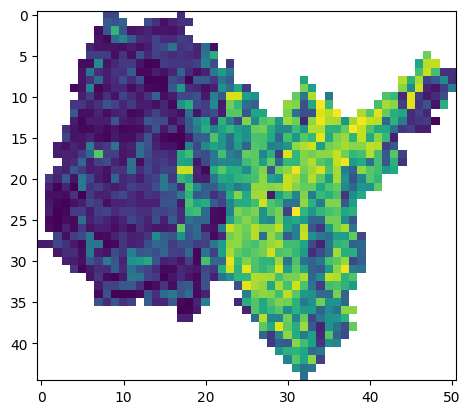

In [75]:
plt.imshow(array[index, :, :])

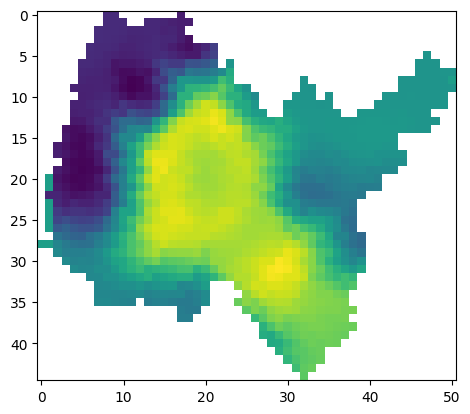

In [76]:
plt.imshow(array[0, :, :])

In [47]:
np.argwhere(np.isnan(array))

array([], shape=(0, 3), dtype=int64)

(21, 61, 30, 30, 1)


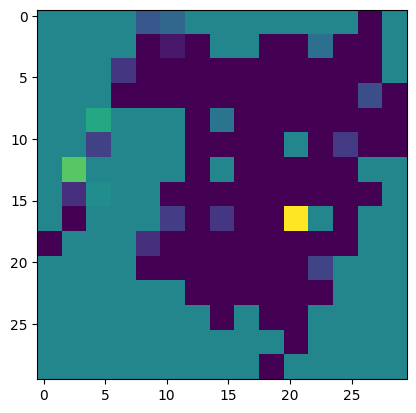

In [92]:
pathdisk = Path('/media/caron/X9 Pro/travaille/Thèse/Model/HexagonalScale/ST-GNN-for-wildifre-prediction/Prediction/GNN/firemen/firepoint/2x2/train/2D_database/image_per_node/z-score/test')
array = pickle.load(open(pathdisk / 'X_2088.pkl', 'rb'))
print(array.shape)
plt.imshow(array[6, 10])

In [ ]:
print(np.max(array[0:,:,6:, 7])), print(np.min(array))

IndexError: too many indices for array: array is 3-dimensional, but 4 were indexed

In [ ]:
print(np.argwhere(array == np.max(array)))

[[ 0  0  0  4  7]
 [ 0  0  1  4  7]
 [ 0  0  2  4  7]
 ...
 [17 24 22  4  7]
 [17 24 23  4  7]
 [17 24 24  4  7]]


In [ ]:
np.argwhere(np.isnan(array))

array([], shape=(0, 5), dtype=int64)

In [ ]:
np.unique(array[:,:,0]), np.unique(array[:,:,3]), np.unique(array[:,:,4])

(array([0.]), array([1.]), array([650.]))

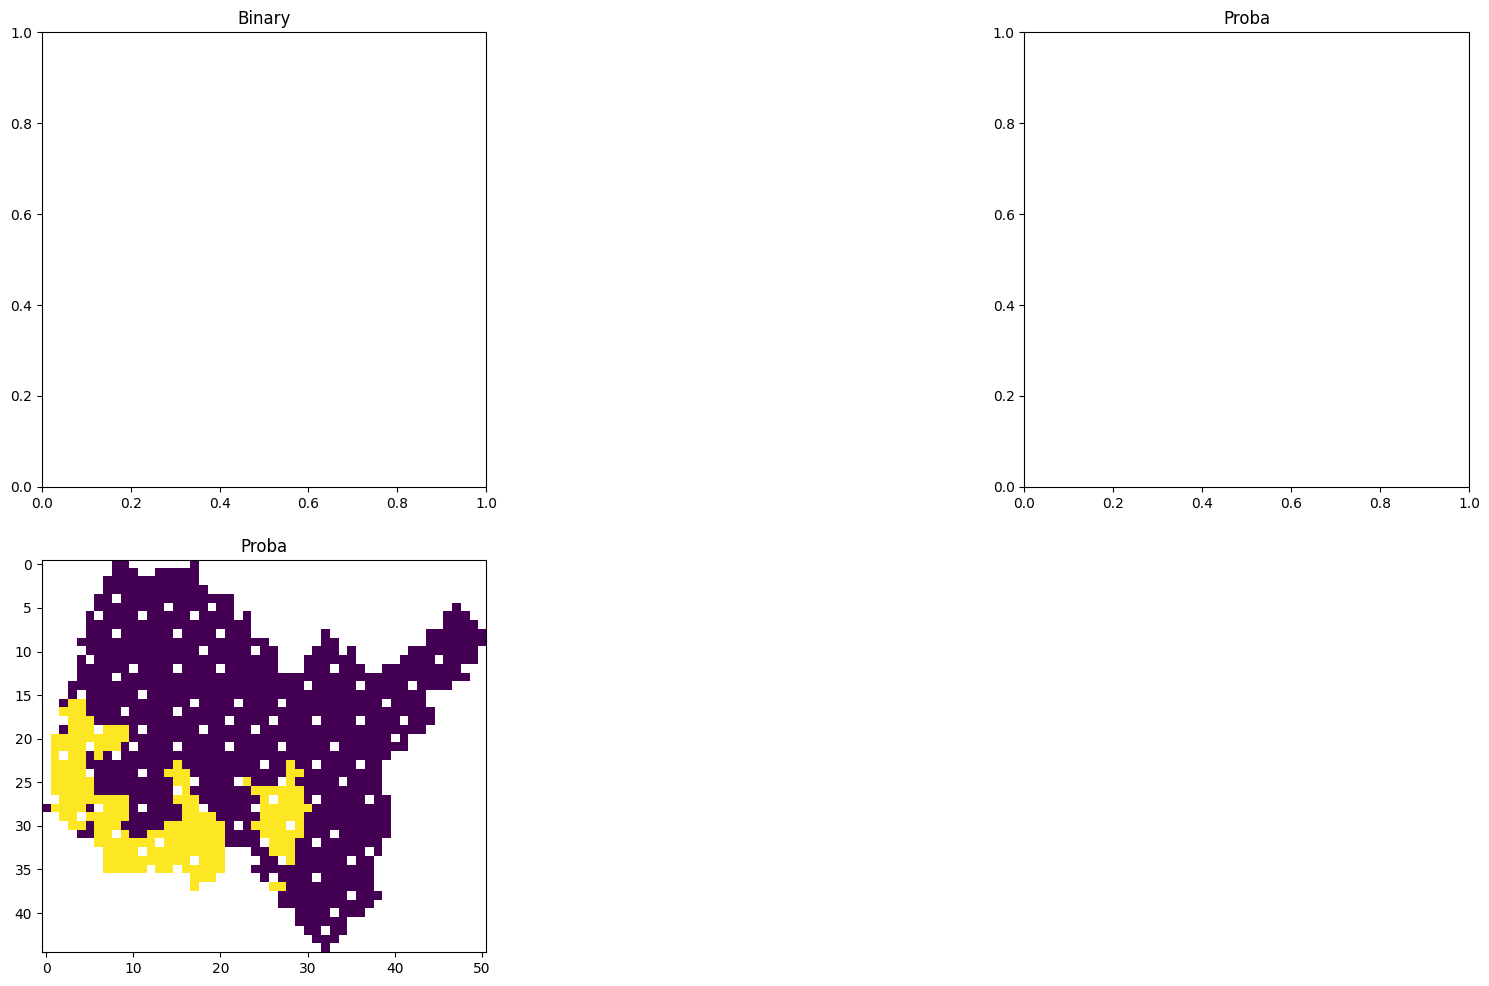

In [16]:
dir_dataset = Path('firemen/firepoint/2x2/train')
departement = 'departement-01-ain'

name = departement+'binScale5'+'.pkl'
#bin = pickle.load(open(dir_dataset / 'bin' / '2x2' / name, 'rb'))

name = departement+'rasterScale10_risk-watershed'+'.pkl'
raster = pickle.load(open(dir_dataset / 'raster' / name, 'rb'))
m = np.isnan(raster)

name = departement+'influence'+'.pkl'
#proba10 = pickle.load(open(dir_dataset / '../../log/' / name, 'rb'))

fig = plt.figure(figsize=(15,15))

temporalIndex = 198

ax = fig.add_subplot(331)
#ax.imshow(bin[:,:, temporalIndex], cmap='jet')
ax.set_title('Binary')  
ax = fig.add_subplot(333)
#ax.imshow(proba10[:,:,temporalIndex], cmap='jet', vmin=0, vmax=np.nanmax(proba10))
ax.set_title('Proba')
ax = fig.add_subplot(334)
im = (raster == 2).astype(float)
im[m] = np.nan
ax.imshow(im)
ax.set_title('Proba')
plt.tight_layout()

-0.7712443 0.8655579


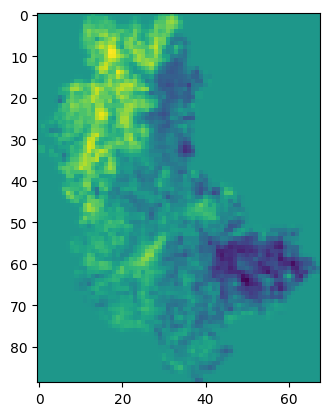

In [ ]:
pop = read_object('summer.pkl', Path('test/69/2D'))
print(np.min(pop), np.max(pop))
plt.imshow(pop[1, :,:])

0.02279853982910449 0.1859829009789373
(3661,)


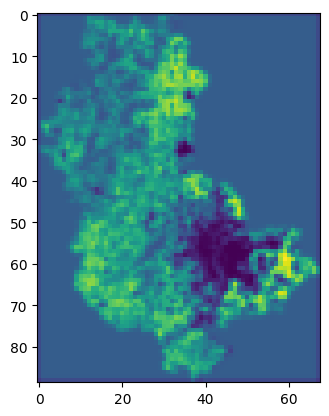

In [ ]:
pop = read_object('landcover.pkl', Path('test/69/2D'))
print(np.nanmin(pop), np.nanmax(pop)), print(np.unique(pop).shape)
plt.imshow(pop)

In [ ]:
landcover_encoder = read_object('encoder_landcover.pkl', Path('Encoder'))
landcover_encoder.transform([3])

,0
0,0.114528


0.048640198418870566 0.18489370048183457 [0.0486402  0.05894604 0.06654898 0.06964351 0.07095379 0.07348223
 0.08047545 0.08178656 0.09222849 0.09738813 0.09901447 0.11394729
 0.15660794 0.1848937 ]


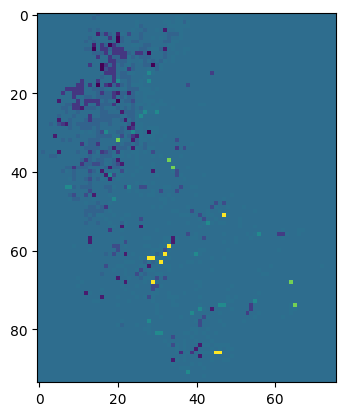

In [ ]:
pop = read_object('foret.pkl', Path('test/69/2D'))
print(np.nanmin(pop), np.nanmax(pop), np.unique(pop))
plt.imshow(pop)

In [ ]:
foret_encoder = read_object('encoder_foret.pkl', Path('Encoder'))
foret_encoder.transform([5])

,0
0,0.107679


0.4231158494949341 0.8377962112426758


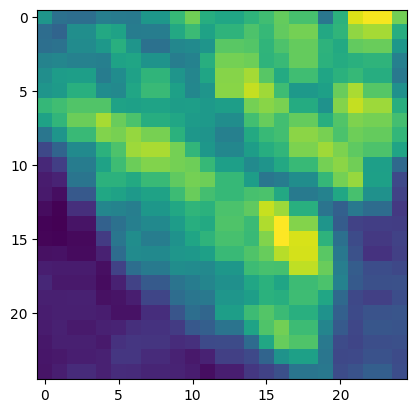

In [ ]:
featureTest = 'sentinel'
plt.imshow(array[:,:,features_name.index(featureTest) + 6])
print(array[:,:,features_name.index(featureTest)].min(),array[:,:,features_name.index(featureTest)].max())

(51, 48)


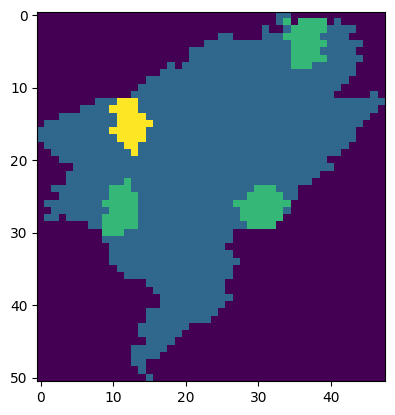

In [ ]:
testBin = read_object('testBin.pkl', Path('./'))
print(testBin.shape)
plt.imshow(testBin[:,:])